## AlexNet

In [1]:
import  cv2,os
from PIL import Image 
from PIL import Image, ImageOps 
data_path=r'C:\Users\Dell\Desktop\499\dataset bangla\BdSL-D1500\BdSL-D1500'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'0': 0, '00': 1, '000': 2, '1': 3, '2': 4, '3': 5, '4': 6, '5': 7, '6': 8, '7': 9, '8': 10, '9': 11, 'Counting': 12, 'S10_ko_CC': 13, 'S11_Kho_CC': 14, 'S12_go_CC': 15, 'S13_gho_CC': 16, 'S14_Umo_CC': 17, 'S15_co_CC': 18, 'S16_Cho_CC': 19, 'S17_jo_CC': 20, 'S18_jho_CC': 21, 'S19_Io_CC': 22, 'S1_o_CC': 23, 'S20_To_CC': 24, 'S21_THo_CC': 25, 'S22_Do_CC': 26, 'S23_Dho_CC': 27, 'S24_no_CC': 28, 'S25_to_CC': 29, 'S26_tho_CC': 30, 'S27_do_CC': 31, 'S28_dho_CC': 32, 'S29_po_CC': 33, 'S2_a_CC': 34, 'S30_fo_CC': 35, 'S31_bo_CC': 36, 'S32_mo_CC': 37, 'S33_lo_CC': 38, 'S34_so_CC': 39, 'S35_ho_CC': 40, 'S36_onnosar_CC': 41, 'S37_bissorgo_CC': 42, 'S38_Chandrabindu_CC': 43, 'S3_i_CC': 44, 'S4_u_CC': 45, 'S5_ro_CC': 46, 'S6_e_CC': 47, 'S7_Oi_CC': 48, 'S8_O_CC': 49, 'S9_OU_CC': 50, 'Sign 10_ Gho': 51, 'Sign 11_co': 52, 'Sign 12_cho': 53, 'Sign 13_jo': 54, 'Sign 14_Jho': 55, 'Sign 15_To': 56, 'Sign 16_THo': 57, 'Sign 17_DO': 58, 'Sign 18_DHO': 59, 'Sign 19_to': 60, 'Sign 1_o': 61, 'Sign 20_tho': 62, 

In [2]:
import numpy as np
import cv2
import os
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
import sklearn.metrics as skmetrics
import random
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import glob
from PIL import ImageTk, Image
from PIL import Image, ImageEnhance
from PIL import Image, ImageFilter 
from PIL import Image, ImageOps


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('C:\Users\Dell\Desktop\499\dataset bangla\BdSL-D1500\BdSL-D1500')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout 
import keras
from keras.preprocessing.image import ImageDataGenerator



In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pylab as plt


In [5]:
TRAIN_DIRECTORY = r'C:\Users\Dell\Desktop\499\dataset bangla\Dataset\train'
VAL_DIRECTORY = r'C:\Users\Dell\Desktop\499\dataset bangla\Dataset\val'
TEST_DIRECTORY = r'C:\Users\Dell\Desktop\499\dataset bangla\Dataset\train'

In [6]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Normalize
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from tqdm import tqdm as tqdm
import torch.optim.lr_scheduler as lr_scheduler




In [7]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
img_transform = transforms.Compose([transforms.Resize((227,227)), transforms.ToTensor()])

train_data = ImageFolder(TRAIN_DIRECTORY, transform=img_transform)
val_data = ImageFolder(VAL_DIRECTORY, transform=img_transform)
test_data = ImageFolder(TEST_DIRECTORY, transform=img_transform)

In [9]:

train_dl = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_data, batch_size=64, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_data, batch_size=64,shuffle=True, num_workers=4, pin_memory=True)


In [10]:
train_data_size = len(train_data)
test_data_size = len(test_data)

In [11]:
training_data = enumerate(train_dl)
batch_idx, (images, labels) = next(training_data)
print(images.shape) # Size of the image
print(labels.shape) # Size of the labels

torch.Size([64, 3, 227, 227])
torch.Size([64])


In [12]:
import torch
import torchvision.models as models

# Download the pre-trained AlexNet model
model = models.alexnet(pretrained=True)

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
num_classes = 87
num_features = model.classifier[6].in_features
model.classifier[6] = torch.nn.Linear(num_features, num_classes)

In [15]:
learning_rate=0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)
 

In [14]:
model = model.to(device)

In [16]:
num_classes = 87
num_epochs = 5
batch_size = 64

In [17]:
for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    correct_predictions = 0

    for images, labels in train_dl:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track training loss and accuracy
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss = running_loss / len(train_data)
    train_accuracy = correct_predictions / len(train_data)

    # Validation
    model.eval()
    test_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():
        for images, labels in test_dl:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Track validation loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy
    test_loss = test_loss / len(test_data)
    test_accuracy = correct_predictions / len(test_data)

    # Print progress for each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch [1/5], Train Loss: 0.7422, Train Accuracy: 0.8076, Test Loss: 0.0661, Test Accuracy: 0.9801
Epoch [2/5], Train Loss: 0.1368, Train Accuracy: 0.9610, Test Loss: 0.0822, Test Accuracy: 0.9744
Epoch [3/5], Train Loss: 0.1304, Train Accuracy: 0.9633, Test Loss: 0.0641, Test Accuracy: 0.9855
Epoch [4/5], Train Loss: 0.1218, Train Accuracy: 0.9654, Test Loss: 0.0414, Test Accuracy: 0.9908
Epoch [5/5], Train Loss: 0.1119, Train Accuracy: 0.9686, Test Loss: 0.0531, Test Accuracy: 0.9858


In [14]:
from tabulate import tabulate

In [15]:
model = AlexNet()
layers = [
    ["Layer","Input Shape","Output Shape"],
    ["Conv1","227x227x3","55x55x96"],
    ["MaxPool","55x55x96","27x27x96"],
    ["Conv2","27x27x96","27x27x256"],
    ["MaxPool","27x27x256","13x13x256"],
    ["Conv3","13x13x256","13x13x384"],
    ["Conv4","13x13x384","13x13x384"],
    ["Conv5","13x13x384","13x13x256"],
    ["MaxPool","13x13x256","6x6x256"],
    ["FC1","6x6x256","9216"],
    ["FC2","9216","4096"],
    ["FC3","4096","4096"],
    ["FC4","4096","87"],
    
]
table = tabulate(layers, headers="firstrow",tablefmt="grid")
print(table)


+---------+---------------+----------------+
| Layer   | Input Shape   | Output Shape   |
+=========+===============+================+
| Conv1   | 227x227x3     | 55x55x96       |
+---------+---------------+----------------+
| MaxPool | 55x55x96      | 27x27x96       |
+---------+---------------+----------------+
| Conv2   | 27x27x96      | 27x27x256      |
+---------+---------------+----------------+
| MaxPool | 27x27x256     | 13x13x256      |
+---------+---------------+----------------+
| Conv3   | 13x13x256     | 13x13x384      |
+---------+---------------+----------------+
| Conv4   | 13x13x384     | 13x13x384      |
+---------+---------------+----------------+
| Conv5   | 13x13x384     | 13x13x256      |
+---------+---------------+----------------+
| MaxPool | 13x13x256     | 6x6x256        |
+---------+---------------+----------------+
| FC1     | 6x6x256       | 9216           |
+---------+---------------+----------------+
| FC2     | 9216          | 4096           |
+---------

## VGG-16

In [7]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"C:\Users\Dell\Desktop\499\dataset bangla\Dataset\train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"C:\Users\Dell\Desktop\499\dataset bangla\Dataset\test", target_size=(224,224))

Found 92439 images belonging to 87 classes.
Found 13213 images belonging to 87 classes.


In [8]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=87, activation="softmax"))

In [9]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=5,generator=traindata, validation_data= testdata, validation_steps=5,epochs=30,callbacks=[checkpoint,early])

C:\Users\Dell\AppData\Local\Temp\ipykernel_9132\3433307324.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=5,generator=traindata, validation_data= testdata, validation_steps=5,epochs=30,callbacks=[checkpoint,early])


Epoch 1/30
5/5 [==============================] - 237s 50s/step - loss: 4.4657 - accuracy: 0.0125 - val_loss: 4.4665 - val_accuracy: 0.0312
Epoch 2/30
5/5 [==============================] - 226s 47s/step - loss: 4.4664 - accuracy: 0.0063 - val_loss: 4.4642 - val_accuracy: 0.0063
Epoch 3/30
5/5 [==============================] - 228s 48s/step - loss: 4.4647 - accuracy: 0.0125 - val_loss: 4.4642 - val_accuracy: 0.0250
Epoch 4/30
5/5 [==============================] - 229s 48s/step - loss: 4.4681 - accuracy: 0.0063 - val_loss: 4.4670 - val_accuracy: 0.0188
Epoch 5/30
5/5 [==============================] - 228s 48s/step - loss: 4.4667 - accuracy: 0.0063 - val_loss: 4.4699 - val_accuracy: 0.0000e+00
Epoch 6/30
5/5 [==============================] - 227s 48s/step - loss: 4.4699 - accuracy: 0.0063 - val_loss: 4.4694 - val_accuracy: 0.0000e+00
Epoch 7/30
5/5 [==============================] - 229s 48s/step - loss: 4.4667 - accuracy: 0.0125 - val_loss: 4.4653 - val_accuracy: 0.0063
Epoch 8/30
5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


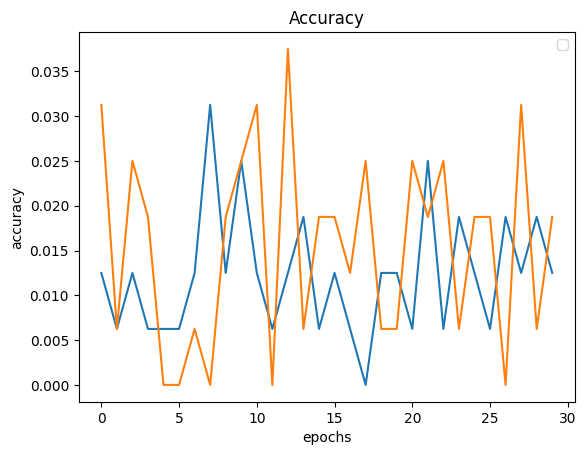

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


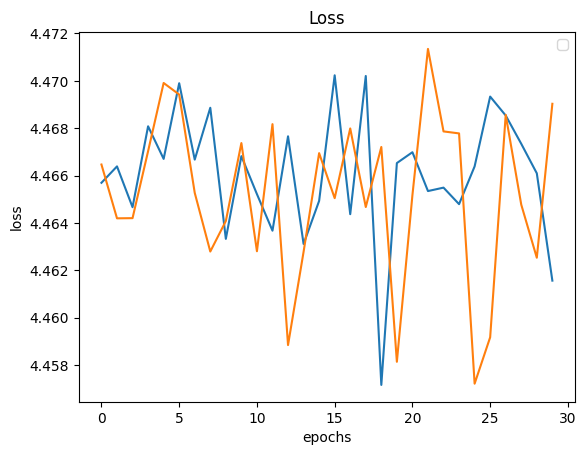

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()